<a href="https://colab.research.google.com/github/harikapanuganti26/SENTIMENT_ANALYSIS_TEXT/blob/main/SENTIMENT_ANALYSIS_TEXT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EMOTION DETECTION OF TEXT

+ Text Classification
+ Sentiment Analysis

In [ ]:
#Load packages 
import pandas as pd #Used to read csv dataset file and perform functions on Data frames
import numpy as np

In [ ]:
#Load Data Viz pkgs to plot bar graphs 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Text cleaning
!pip install neattext #NLP package for cleaning data (removing unwanted data from data set)
import neattext.functions as nfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 6.8 MB/s 


In [ ]:
#Load Dataset
df=pd.read_csv("/content/sample_data/Working_dataset.csv") #Reading Dataset 'Working_dataset.csv' file

In [ ]:
df.head()

,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
#Shape of Databse
df.shape #Total number of rows and coloumns

(27843, 2)

In [ ]:
#Datatypes in Dataset
df.dtypes

Text       object
Emotion    object
dtype: object

In [ ]:
#Check for any Missing Values 
df.isnull().sum() #To check if any coloumn or row is nill

Text       0
Emotion    0
dtype: int64

In [ ]:
#Value counts of emotions
df['Emotion'].value_counts() #Gives number count of each emotion in Dataset

sadness     8123
joy         8057
anger       4325
love        2750
fear        2518
surprise    2070
Name: Emotion, dtype: int64

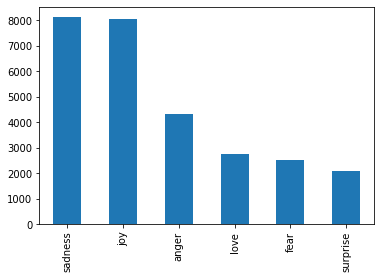

In [ ]:
#Value counts of emotions
df['Emotion'].value_counts().plot(kind='bar') #PLotting the value counts

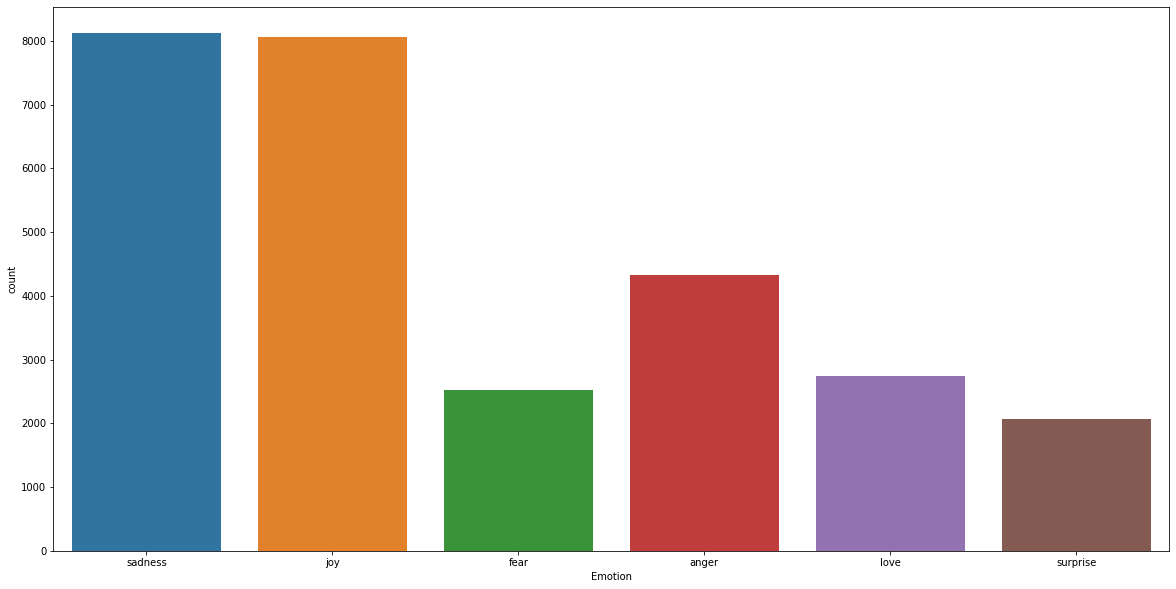

In [ ]:
#Using seaborn to plot value count of emotions
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()

###Exploration

+ Text Cleaning
+ Sentiment Analysis
+ Keyword Extraction
  - Key words (features) extraction for each emotion
  - Display using Wordcloud


In [ ]:
#Sentiment Analysis
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
  blob=TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment>0:
    result="Positive"
  elif sentiment<0:
    result="Negative"
  else:    
    result="Neutral"
  return(result) 


In [ ]:
#Test Function
get_sentiment("I hate running") #Calling the function

'Negative'

In [ ]:
#Applying it to the enitre Dataset
df['Sentiment'] = df['Text'].apply(get_sentiment) #Creating a new data frame 'Sentiment' and applying 'get_sentiment()' function to the text and assigning it's value

In [ ]:
df.head() #Preview the changes

,Text,Emotion,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness,Positive
1,im updating my blog because i feel shitty,sadness,Neutral
2,i never make her separate from me because i do...,sadness,Neutral
3,i left with my bouquet of red and yellow tulip...,joy,Positive
4,i was feeling a little vain when i did this one,sadness,Negative


In [ ]:
#Compare our Emotion vs Sentiment
df.groupby(['Emotion','Sentiment']).size() #Grouping Emotion and Sentiment and checking total number of value counts in Data Set

Emotion   Sentiment
anger     Negative     2577
          Neutral      1029
          Positive      719
fear      Negative     1082
          Neutral       708
          Positive      728
joy       Negative      749
          Neutral      2300
          Positive     5008
love      Negative      335
          Neutral      1022
          Positive     1393
sadness   Negative     3281
          Neutral      3134
          Positive     1708
surprise  Negative      298
          Neutral      1429
          Positive      343
dtype: int64

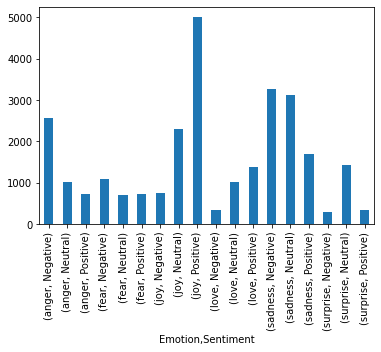

In [ ]:
#PLotting the above using Matplotlib
#Emotion vs Sentiment
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

In [ ]:
#Plotting Emotion vs Sentiment using seaborn for Asthetics and Simple understanding 
#Used to draw different kinds of plot
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot>

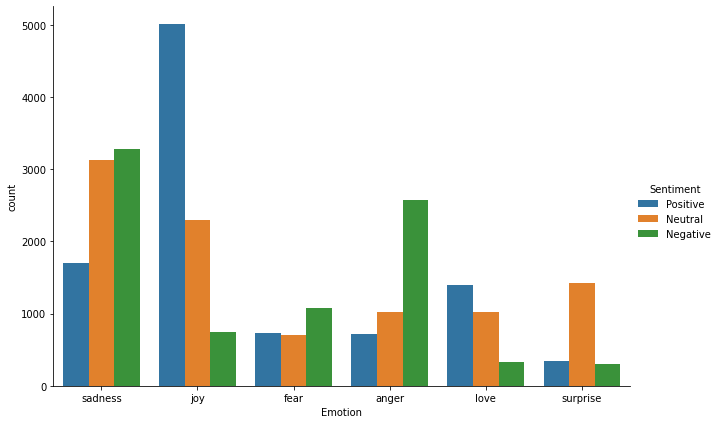

In [ ]:
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',height=6,aspect=1.5) #Assigning values and size of plot

###Text Cleaning 
+ Remove Noise
 - Stopwords 
 - Special characters
 - Punctuations 
 - Emojis

In [ ]:
dir(nfx) #Returns properties of (nfx) neattext functions that cleans data by removing noise

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df['Clean_Text']=df['Text'].apply(nfx.remove_stopwords) #Removing stopwords like ("a","the","is","are") from Text and assigning it to new data frame called Clean_Text

In [ ]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_punctuations) #Removing punctations like ("!","?",".") from Text and assigning it to new data frame called Clean_Text

In [ ]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_userhandles) #Removing user_handles like @Imposter123 

In [ ]:
df[['Text','Clean_Text']] #Displaying the Clean_Text

,Text,Clean_Text
0,im feeling rather rotten so im not very ambiti...,im feeling rotten im ambitious right
1,im updating my blog because i feel shitty,im updating blog feel shitty
2,i never make her separate from me because i do...,separate want feel like ashamed
3,i left with my bouquet of red and yellow tulip...,left bouquet red yellow tulips arm feeling sli...
4,i was feeling a little vain when i did this one,feeling little vain
...,...,...
27838,Vacation,Vacation
27839,Ice cream,Ice cream
27840,yummy,yummy
27841,hurt,hurt


###Key word Extraction
+ Extract common words per class of emoiton

In [ ]:
from collections import Counter #Keep the count of values

In [ ]:
#Defining a function to extract keywords
def extract_keywords(text,num=50):
  tokens = [tok for tok in text.split()] #Splitting text into words and storing list in tokens
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)#Returns the most common key words from each emotion

In [ ]:
#List of Emotions
emotion_list= df['Emotion'].unique().tolist() #Assigning emotion types and forming a list

In [ ]:
emotion_list

['sadness', 'joy', 'fear', 'anger', 'love', 'surprise']

In [ ]:
joy_list=df[df['Emotion']=='joy']['Clean_Text'].tolist()#Combining Emotion 'joy' with Clean_Text and forming a list

In [ ]:
#Joy document
joy_docx = ' '.join(joy_list)

In [ ]:
joy_docx

'left bouquet red yellow tulips arm feeling slightly optimistic arrived explain clung relationship boy ways immature uncommitted despite excitement feeling getting accepted masters program university virginia like breathless feeling reader eager happen feel extremely comfortable group people dont need hide feel little mellow today feel like reds purples rich kind perfect feel like ive gotten know comments emails im appreciative glad little space survey posts years feel pleased vague snippets feel little bits capture like like dublin st century feel virtuous eat veggies dipped hummus feel honoured included magzine prioritises health clean living highly im curious read magazines concerned health clean lifestyles green parent im feeling peaceful wedding talking coach claudia barcomb coach ali boe long time feel welcomed union feel reassured dealing diet right way good im happy mood today feel delighted havent different today normally wonderful know feel friendly affection feel like produc

In [ ]:
#Extract Joy Keywords
keyword_joy = extract_keywords(joy_docx)

In [ ]:
keyword_joy

{'Ice': 174,
 'Sunday': 174,
 'Vacation': 174,
 'able': 102,
 'better': 132,
 'bit': 105,
 'cream': 178,
 'day': 203,
 'days': 102,
 'dont': 181,
 'excited': 111,
 'feel': 4942,
 'feeling': 1942,
 'feelings': 122,
 'feels': 133,
 'find': 98,
 'free': 102,
 'going': 217,
 'good': 240,
 'got': 125,
 'happy': 190,
 'help': 111,
 'holiday': 188,
 'hurray': 169,
 'im': 1007,
 'important': 105,
 'ive': 216,
 'know': 322,
 'life': 231,
 'like': 1254,
 'little': 236,
 'look': 108,
 'makes': 115,
 'need': 167,
 'new': 98,
 'people': 265,
 'pretty': 234,
 'puppy': 177,
 'right': 152,
 'sure': 144,
 'things': 179,
 'think': 235,
 'time': 359,
 'today': 152,
 'want': 250,
 'way': 176,
 'work': 153,
 'year': 104,
 'yipeeeee': 169,
 'yummy': 175}

In [ ]:
#Plotting the number of times each keyword present
def plot_most_common_words(mydict,emotion_name):
  df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
  plt.figure(figsize=(20,10))
  plt.title("Plot of {} Most Common Keywords".format(emotion_name))
  sns.barplot(x='token',y='count',data = df_01)
  plt.xticks(rotation=45)
  plt.show()

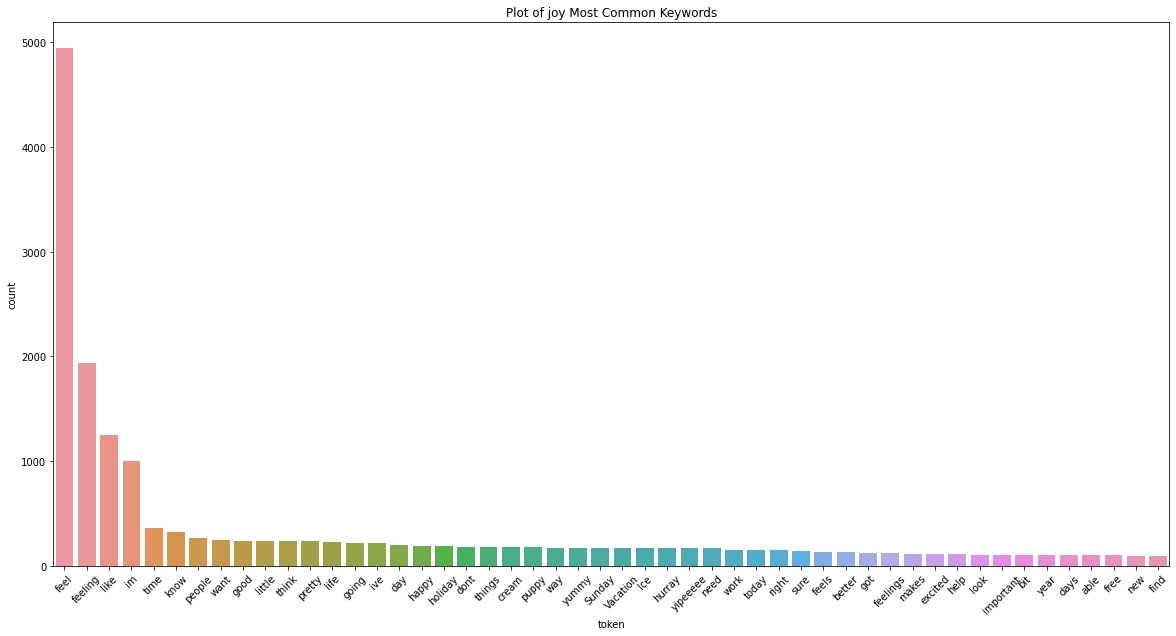

In [ ]:
plot_most_common_words(keyword_joy,"joy")#Plotting most common joy keywords

In [ ]:
#Repeating same steps for 'Surprise' emotion
surprise_list=df[df['Emotion']=='surprise']['Clean_Text'].tolist()
#Document
surprise_docx = ' '.join(surprise_list)
#Extract keywords
keyword_surprise = extract_keywords(surprise_docx)


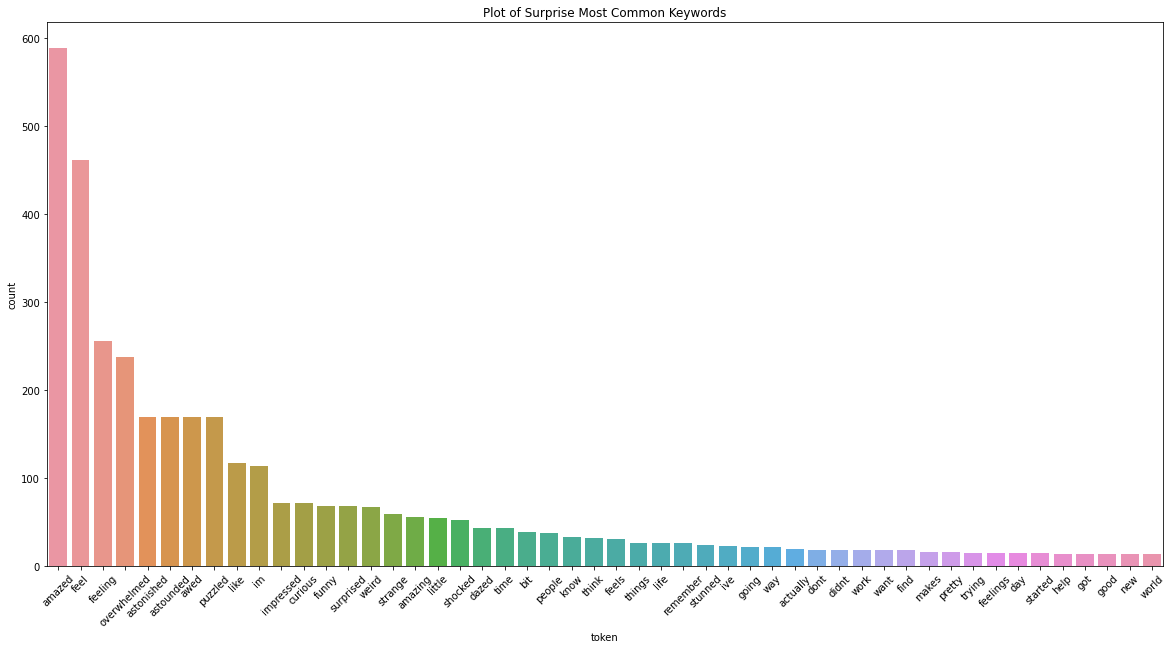

In [ ]:
plot_most_common_words(keyword_surprise,"Surprise")

In [ ]:
#Wordcloud is visual representation of words
from wordcloud import WordCloud

In [ ]:
#Defining a function to display the most common words using wordcloud
def plot_wordcloud(docx):
  mywordcloud = WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

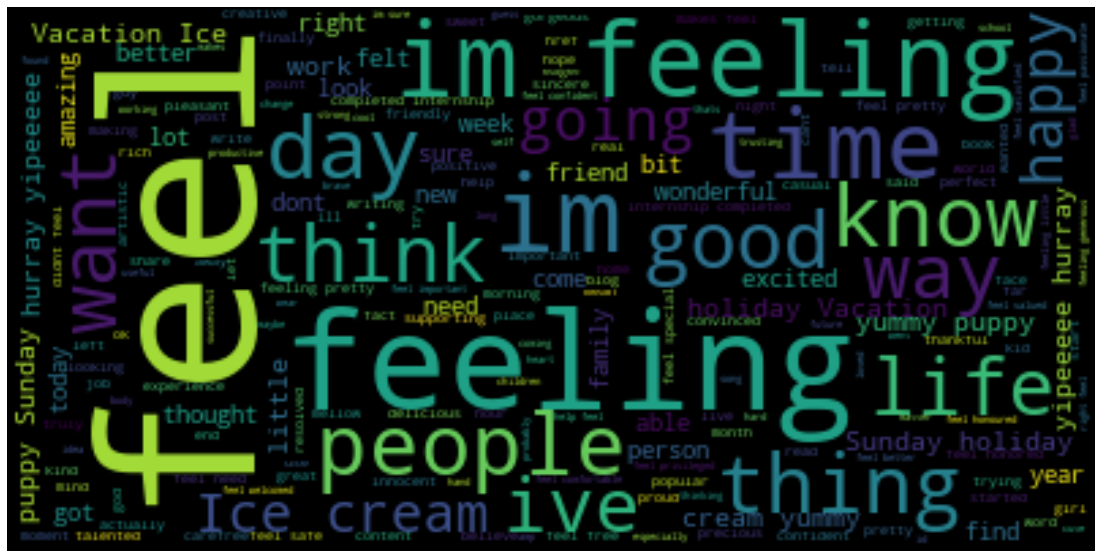

In [ ]:
plot_wordcloud(joy_docx)

###Machiene Learning
+ Naive Bayes
+ LogisticRegression


In [ ]:
#Load ML Pkgsfrom
from sklearn.linear_model import LogisticRegression #From sklearn extracting Logistic Regression Feature
from sklearn.naive_bayes import MultinomialNB       #From sklearn extracting MultinomialNB Feature

#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer #Used to factorize data

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix #Importing fuctions for accuracy,confusion matrix and plotting

In [ ]:
#Split our dataset
from sklearn.model_selection import train_test_split #Splitting into Training and Testing Data

###Build Features from our Text

In [ ]:
Xfeatures = df['Clean_Text'] #Assigning Clean_Text data frame to Xfeatures
ylabels = df['Emotion'] #Assigning Emotion data frame to ylabels

In [ ]:
Xfeatures

0                     im feeling rotten im ambitious right
1                             im updating blog feel shitty
2                          separate want feel like ashamed
3        left bouquet red yellow tulips arm feeling sli...
4                                      feeling little vain
                               ...                        
27838                                             Vacation
27839                                            Ice cream
27840                                                yummy
27841                                                 hurt
27842                                                puppy
Name: Clean_Text, Length: 27843, dtype: object

In [ ]:
#Vectorizer
cv = CountVectorizer() #Convert text into a vector
X=cv.fit_transform(Xfeatures) #Meand and variance of each feature

In [ ]:
#Get features by Name
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['3rd',
 'aa',
 'aaaaaaand',
 'aaaaand',
 'aaaah',
 'aaaand',
 'aac',
 'aahhh',
 'aaron',
 'ab',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abated',
 'abba',
 'abbigail',
 'abc',
 'abdomen',
 'abdominal',
 'abducted',
 'abelard',
 'abhorrent',
 'abide',
 'abilities',
 'ability',
 'abit',
 'able',
 'ableness',
 'ablo',
 'abnormally',
 'aboard',
 'abolish',
 'abominable',
 'abortion',
 'abou',
 'abound',
 'abraham',
 'abroad',
 'abroadquot',
 'abruptly',
 'absence',
 'absent',
 'absoloutely',
 'absolute',
 'absolutely',
 'absolutly',
 'absorbed',
 'absorption',
 'abstain',
 'abstinence',
 'abstract',
 'absurd',
 'absurdity',
 'abt',
 'abundance',
 'abundantly',
 'abuse',
 'abused',
 'abuses',
 'abusing',
 'abusive',
 'abyss',
 'ac',
 'academia',
 'academic',
 'academics',
 'academy',
 'acause',
 'accelerated',
 'accent',
 'accentuating',
 'accept',
 'acceptable',
 'acceptance',
 'acceptances',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessaries',
 'accessibili

In [ ]:
#Split Dataset
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42) #Splitting Datasets and assigning them to different variables

#Build our Model

In [ ]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
#Accuracy 
nv_model.score(X_test,y_test)

0.8402968993176104

In [ ]:
#Predictions are made to testing variable
y_pred_for_nv = nv_model.predict(X_test)

In [ ]:
y_pred_for_nv

array(['fear', 'anger', 'love', ..., 'sadness', 'sadness', 'sadness'],
      dtype='<U8')

###Make Single Prediction
+ Vectorized our Text
+ Applied our model


In [ ]:
sample_text = [' I love coding ']

In [ ]:
vect = cv.transform(sample_text).toarray() #Applying transform function to sample_text  

In [ ]:
#Make Predicition
nv_model.predict(vect) #Prediction for sample_text

array(['love'], dtype='<U8')

In [ ]:
#Check for prediction Probability(Percentage) of each 'Emotion'
nv_model.predict_proba(vect)

array([[0.00974602, 0.00936365, 0.04226917, 0.88063723, 0.05447951,
        0.00350441]])

In [ ]:
#Get all class for our Model
nv_model.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'], dtype='<U8')

In [ ]:
np.max(nv_model.predict_proba(vect)) #To return maximum percentage value for our sample_text

0.8806372337620914

In [ ]:
#Defining a function to return prediction based on previously trained machiene model by passing "User Input" and Machiene model(nv_model)

def predict_emotion(review,model):
    myvect=cv.transform(review).toarray()
    prediction=model.predict(myvect)
    pred_proba=model.predict_proba(myvect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print("Prediction:{} , Prediction Score: {}".format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

In [ ]:
s=["worst"]
predict_emotion(s, nv_model)

Prediction:anger , Prediction Score: 0.963949114021996


{'anger': 0.963949114021996,
 'fear': 0.0015320589640060048,
 'joy': 0.01556097073303593,
 'love': 0.00363246761262241,
 'sadness': 0.01188508722425577,
 'surprise': 0.0034403014440843394}

In [ ]:
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.92      0.81      0.86      1260
        fear       0.85      0.55      0.67       763
         joy       0.79      0.94      0.86      2382
        love       0.94      0.63      0.76       824
     sadness       0.82      0.95      0.88      2507
    surprise       0.98      0.73      0.83       617

    accuracy                           0.84      8353
   macro avg       0.88      0.77      0.81      8353
weighted avg       0.85      0.84      0.83      8353



In [ ]:
confusion_matrix(y_test,y_pred_for_nv)

array([[1015,   18,   81,    3,  142,    1],
       [  35,  420,  142,    3,  162,    1],
       [  17,   12, 2234,   19,   95,    5],
       [   6,    1,  230,  519,   68,    0],
       [  27,   12,   78,    4, 2382,    4],
       [   0,   33,   71,    2,   62,  449]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


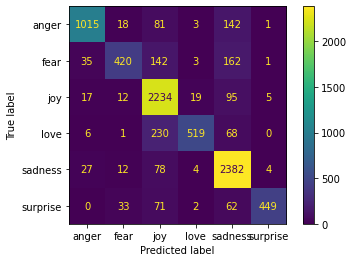

In [ ]:
#Plot confusion matrix
plot_confusion_matrix(nv_model,X_test,y_test)

In [ ]:
import joblib
model_file= open("working_sentiment_model.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

In [ ]:
#Logistic Regression
lr_model=LogisticRegression()
lr_model = LogisticRegression( max_iter=1000)
lr_model.fit(X_train,y_train)

In [ ]:
#Accuracy
lr_model.score(X_test,y_test)

0.9092541601819706

In [ ]:
#Single predict
predict_emotion(s,lr_model)

Prediction:anger , Prediction Score: 0.9828486259113599


{'anger': 0.9828486259113599,
 'fear': 0.002985846758298384,
 'joy': 0.005136248464236115,
 'love': 0.001803272847127106,
 'sadness': 0.004969145345534664,
 'surprise': 0.0022568606734438873}